In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

idx = pd.IndexSlice
data_fol = r"..\data_files"

### Bag of Words model

In [2]:
bow_train = pd.read_pickle(os.path.join(data_fol, "bow_model", "bow_X_train.pkl"))
bow_test = pd.read_pickle(os.path.join(data_fol, "bow_model", "bow_X_test.pkl"))

In [3]:
bow_train.shape, bow_test.shape

((12009, 186), (5915, 186))

#### 1. Scale training data and find number of components needed to explain 80% of variance

components for 80% variance: 135


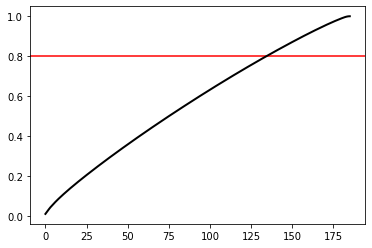

In [6]:
stansca = StandardScaler()
X = stansca.fit_transform(bow_train)
pca = PCA()
pca.fit(X)

fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_),'-', linewidth=2, color='k', zorder=100)
ax.axhline(.8, color='r')
print("components for 80% variance: {}".format(np.where(np.cumsum(pca.explained_variance_ratio_)>=.8)[0][0]))
plt.show()

#### 2. fit and transform training data

In [7]:
ncomp = 135
pca = PCA(n_components=ncomp)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = range(ncomp),
                          index=bow_train.index)

pd.to_pickle(principalDf, os.path.join(data_fol, "bow_model", "bow_X_train_scaled_pca.pkl"))

#### 3. transform test data with standard scaler and PCA

In [8]:
X_test = stansca.transform(bow_test)
test_pcs = pca.transform(X_test)

principalDf_test = pd.DataFrame(data = test_pcs, 
                           columns = range(ncomp),
                          index=bow_test.index)

pd.to_pickle(principalDf, os.path.join(data_fol, "bow_model", "bow_X_test_scaled_pca.pkl"))

### Bigrams model

In [9]:
gram2_train = pd.read_pickle(os.path.join(data_fol, "bigrams_model", "gram2_X_train.pkl"))
gram2_test = pd.read_pickle(os.path.join(data_fol, "bigrams_model", "gram2_X_test.pkl"))

In [10]:
gram2_train.shape, gram2_test.shape

((12009, 186), (5915, 186))

#### 1. Scale training data and find number of components needed to explain 80% of variance

components for 80% variance: 107


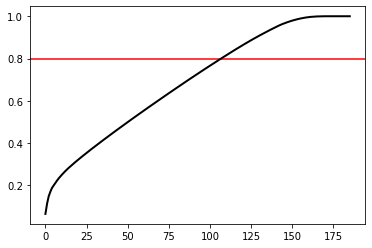

In [11]:
stansca = StandardScaler()
X = stansca.fit_transform(gram2_train)
pca = PCA()
pca.fit(X)

fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_),'-', linewidth=2, color='k', zorder=100)
ax.axhline(.8, color='r')
print("components for 80% variance: {}".format(np.where(np.cumsum(pca.explained_variance_ratio_)>=.8)[0][0]))
plt.show()

#### 2. fit and transform training data

In [12]:
ncomp = 107
pca = PCA(n_components=ncomp)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = range(ncomp),
                          index=gram2_train.index)

pd.to_pickle(principalDf, os.path.join(data_fol, "bigrams_model", "gram2_X_train_scaled_pca.pkl"))

#### 3. transform test data with standard scaler and PCA

In [13]:
X_test = stansca.transform(gram2_test)
test_pcs = pca.transform(X_test)

principalDf_test = pd.DataFrame(data = test_pcs, 
                           columns = range(ncomp),
                          index=gram2_test.index)

pd.to_pickle(principalDf, os.path.join(data_fol, "bigrams_model", "gram2_X_test_scaled_pca.pkl"))

### Bi and tri gram model

In [14]:
gram23_train = pd.read_pickle(os.path.join(data_fol, "bitrigrams_model", "gram23_X_train.pkl"))
gram23_test = pd.read_pickle(os.path.join(data_fol, "bitrigrams_model", "gram23_X_test.pkl"))

In [15]:
gram23_train.shape, gram23_test.shape

((12009, 186), (5915, 186))

#### 1. Scale training data and find number of components needed to explain 80% of variance

components for 80% variance: 79


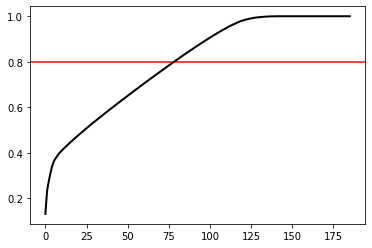

In [16]:
stansca = StandardScaler()
X = stansca.fit_transform(gram23_train)
pca = PCA()
pca.fit(X)

fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_),'-', linewidth=2, color='k', zorder=100)
ax.axhline(.8, color='r')
print("components for 80% variance: {}".format(np.where(np.cumsum(pca.explained_variance_ratio_)>=.8)[0][0]))
plt.show()

#### 2. fit and transform training data

In [17]:
ncomp = 79
pca = PCA(n_components=ncomp)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = range(ncomp),
                          index=gram23_train.index)

pd.to_pickle(principalDf, os.path.join(data_fol, "bitrigrams_model", "gram23_X_train_scaled_pca.pkl"))

#### 3. transform test data with standard scaler and PCA

In [18]:
X_test = stansca.transform(gram23_test)
test_pcs = pca.transform(X_test)

principalDf_test = pd.DataFrame(data = test_pcs, 
                           columns = range(ncomp),
                          index=gram23_test.index)

pd.to_pickle(principalDf, os.path.join(data_fol, "bitrigrams_model", "gram23_X_test_scaled_pca.pkl"))